# Retrieval and Preparation of Daily Exchange Rates Data

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import wget
from datetime import datetime

In [2]:
matplotlib.rcParams['figure.figsize'] = [16, 9]
pd.options.display.max_columns = 999

## Load Data

Daily exchange rates between 1990 and 2016 of eight countries (Australia, Britain, Canada, Switzerland, China, Japan, New Zealand, Singapore).

Source: https://github.com/laiguokun/multivariate-time-series-data/tree/master/traffic

In [3]:
url = 'https://github.com/laiguokun/multivariate-time-series-data/blob/master/exchange_rate/exchange_rate.txt.gz?raw=true'
wget.download(url)

100% [............................................................................] 177142 / 177142

'exchange_rate.txt.gz'

In [4]:
!gzip -d exchange_rate.txt.gz

In [5]:
df = pd.read_csv('exchange_rate.txt', header=None)
df.columns = ['ts%s' % str(col+1) for col in df.columns]
df.head()

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


Add in datetime index (data source says data corresponds to days between 1990 and 2016, although this cannot be replicated perfectly).

In [6]:
df.index = pd.DatetimeIndex(freq='B', start=datetime(1990, 1, 1), periods=len(df))
df.index.name = 'DateTime'
df.tail()

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8
DateTime,,,,,,,,
2019-01-24,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.690846,0.688565
2019-01-25,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.695701,0.690288
2019-01-28,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.695943,0.691419
2019-01-29,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.692689,0.690942
2019-01-30,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.692689,0.690942


In [7]:
# No missing values
df.isnull().any().all() == False

True

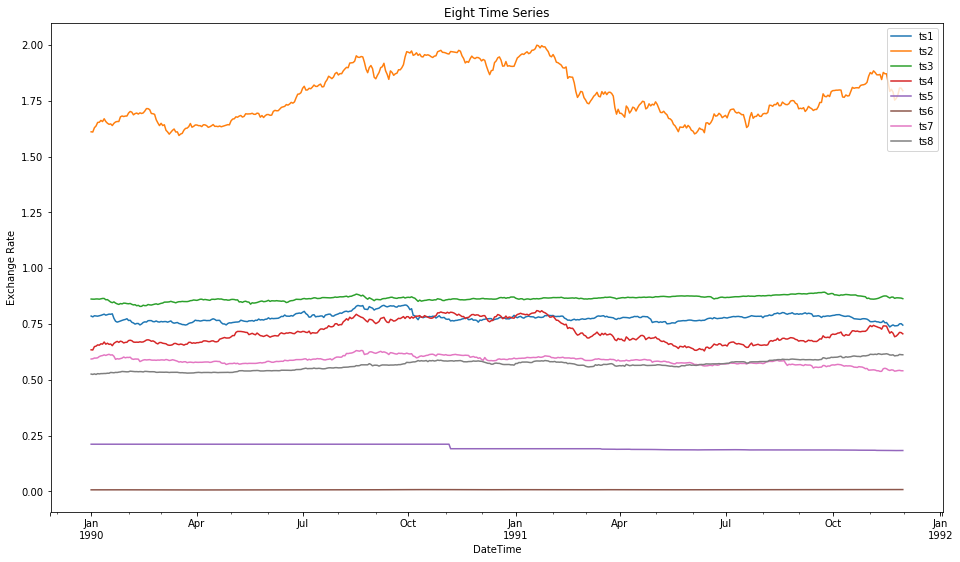

In [8]:
for col in df.columns:
    df[col][:500].plot()
plt.legend()
plt.title("Eight Time Series")
plt.ylabel("Exchange Rate");

# Save Data

In [9]:
!rm exchange_rate.txt

In [10]:
df.to_csv('daily-exchange-rates.csv')